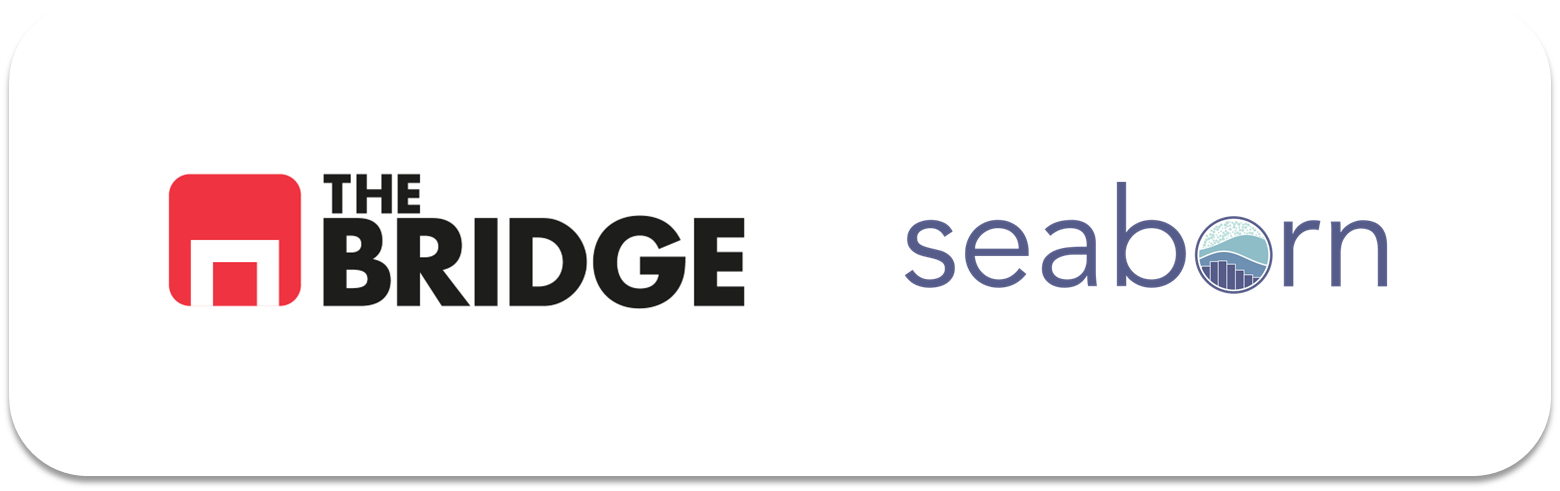

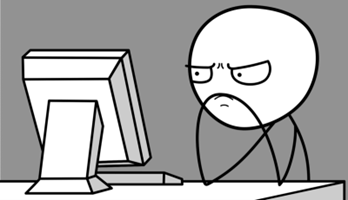

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [2]:
df_titanic = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_8/Unidad_2/Workout/data/titanic.csv")
df_bitcoin = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_8/Unidad_2/Workout/data/BTC.csv")
df_viajes = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_8/Unidad_2/Workout/data/dataset_viajes_jun23.csv")

In [3]:
df_bitcoin

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [4]:
df_bitcoin["date"] = pd.to_datetime(df_bitcoin["date"])
df_bitcoin.set_index("date",inplace=True)

### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [6]:
def plot_categorical_frequencies(df, categorical_columns):
    # Determinar el número de filas y columnas para la matriz de gráficas
    num_columns = 2
    num_rows = math.ceil(len(categorical_columns) / num_columns)

    # Crear la figura
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 5 * num_rows))
    axes = axes.flatten()  # Asegurarse de que los ejes sean iterables

    for i, col in enumerate(categorical_columns):
        # Graficar el diagrama de barras en el eje correspondiente
        sns.countplot(data=df, x=col, ax=axes[i])
        
        # Configurar el título
        axes[i].set_title(f"Frecuencias Absolutas de {col}", fontsize=14)
        axes[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas si es necesario

    # Eliminar ejes sobrantes si hay
    for j in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el layout
    plt.tight_layout()
    plt.show()


### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


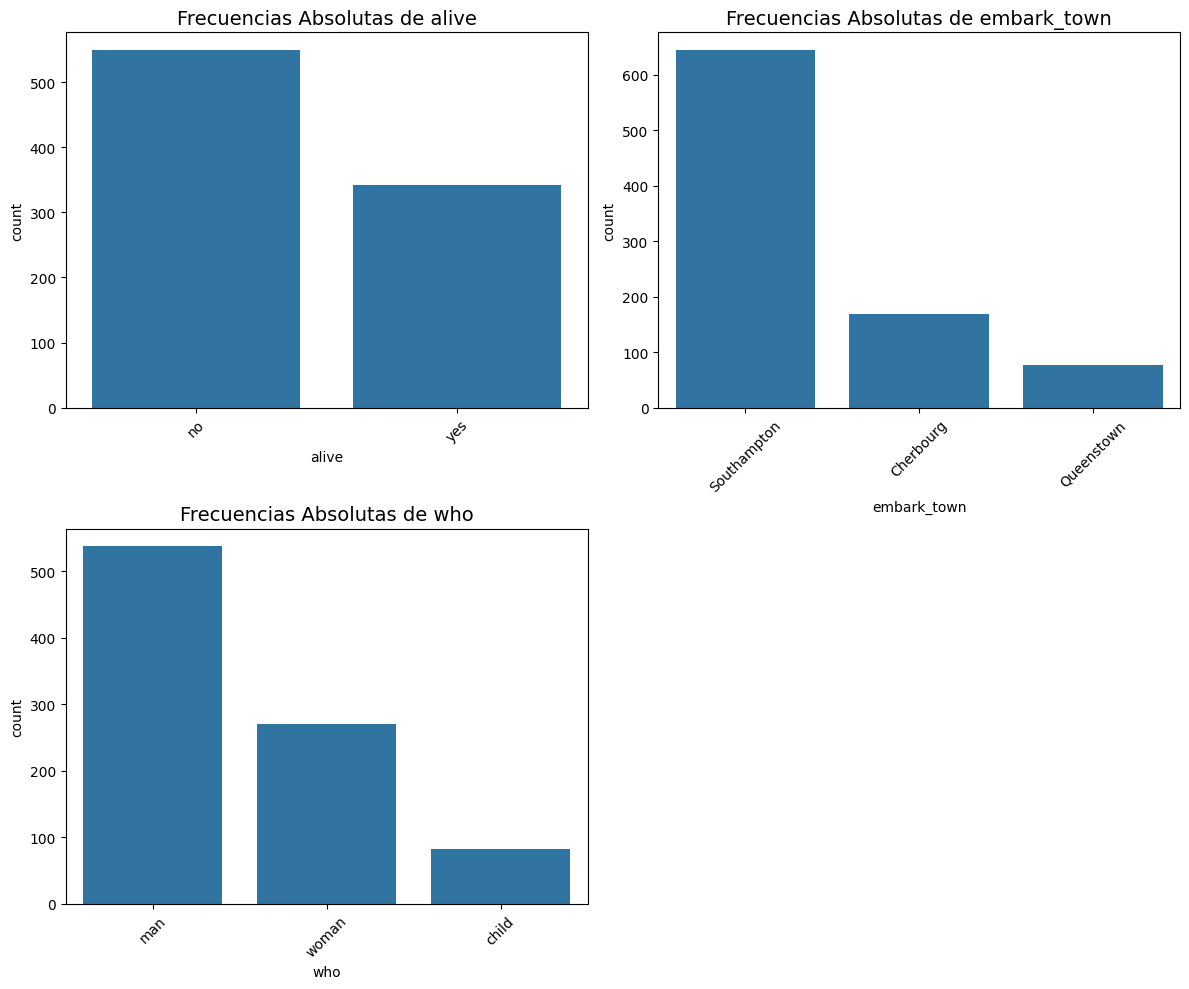

In [8]:
categoricas=["alive","embark_town","who"]

plot_categorical_frequencies(df_titanic,categoricas)

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [9]:
def plot_numerical_histograms(df, numerical_columns, bins=10, kde=False):
   
    # Asegurarse de que las columnas sean nombres o Series
    column_names = [col if isinstance(col, str) else col.name for col in numerical_columns]

    # Determinar el número de filas y columnas para la matriz de gráficas
    num_columns = 2
    num_rows = math.ceil(len(column_names) / num_columns)

    # Crear la figura
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 5 * num_rows))
    axes = axes.flatten()  # Asegurarse de que los ejes sean iterables

    for i, col in enumerate(column_names):
        # Graficar el histograma en el eje correspondiente
        sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=axes[i])
        
        # Configurar el título
        axes[i].set_title(f"Histograma de {col}", fontsize=14)

    # Eliminar ejes sobrantes si hay
    for j in range(len(column_names), len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el layout
    plt.tight_layout()
    plt.show()


### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

Histograma para 10 bins


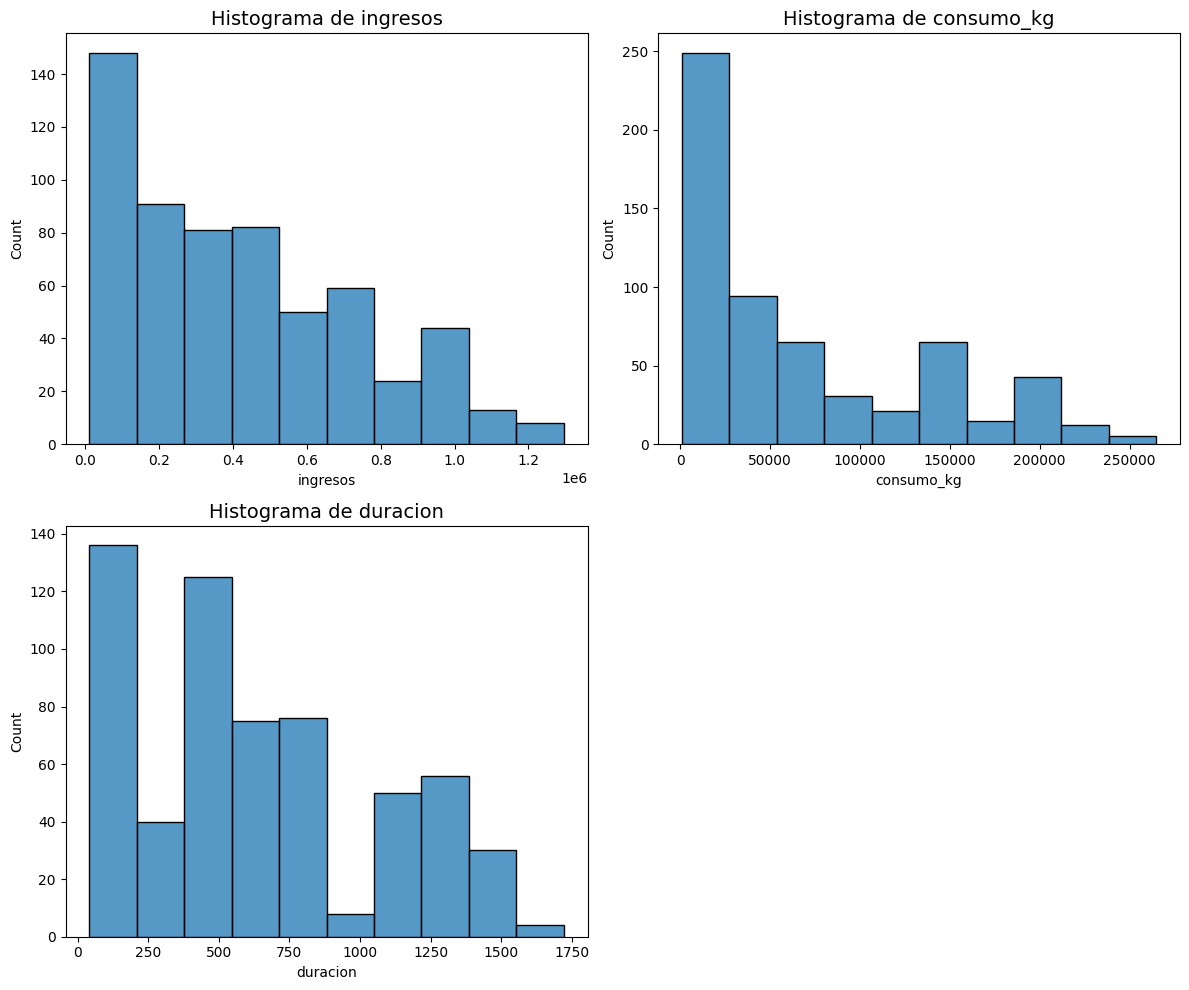

Histograma para 30 bins


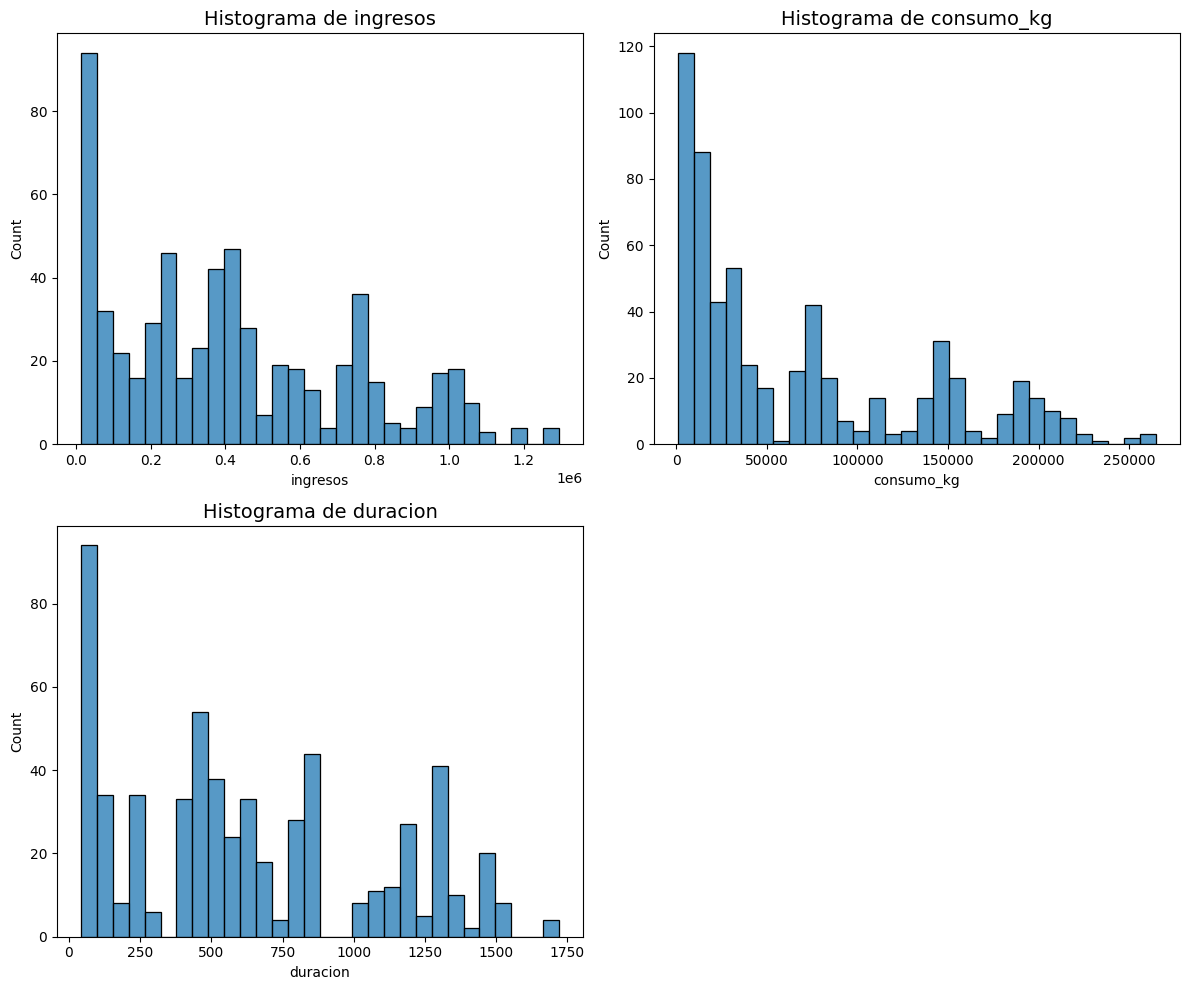

Histograma para 60 bins


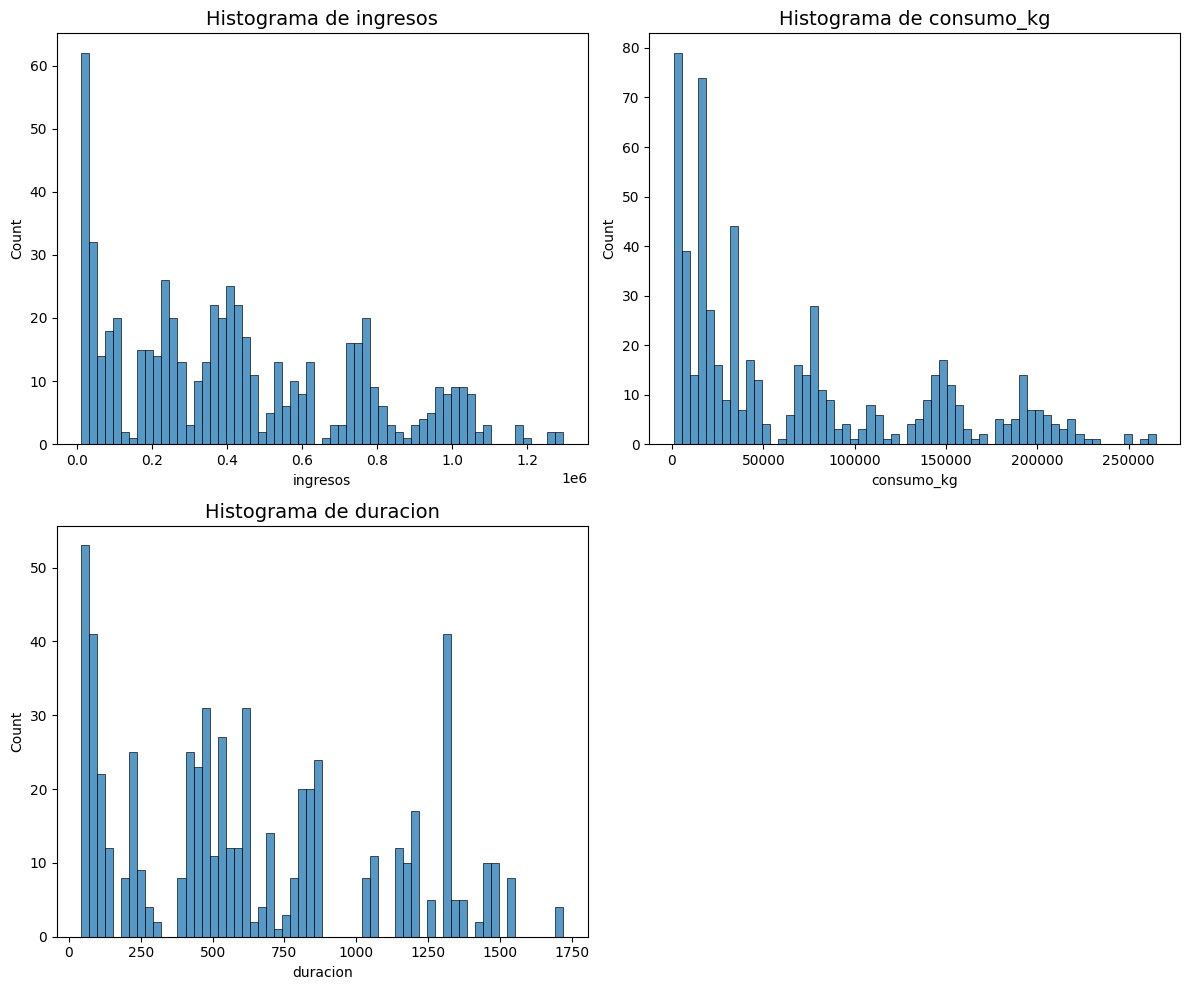

In [13]:
numéricas = ["ingresos","consumo_kg","duracion"]

bins_list = [10,30,60]

for bins in bins_list:
    print("Histograma para",bins, "bins")
    plot_numerical_histograms(df_viajes,numéricas,bins=bins,kde=False)

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [14]:
def plot_time_series(df, numerical_columns):
   
    # Asegurarse de que las columnas sean nombres o Series
    column_names = [col if isinstance(col, str) else col.name for col in numerical_columns]

    # Determinar el número de filas y columnas para la matriz de gráficas
    num_columns = 2
    num_rows = math.ceil(len(column_names) / num_columns)

    # Crear la figura
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 5 * num_rows))
    axes = axes.flatten()  # Asegurarse de que los ejes sean iterables

    for i, col in enumerate(column_names):
        # Graficar la serie temporal en el eje correspondiente
        sns.lineplot(data=df, x=df.index, y=col, ax=axes[i])
        
        # Configurar el título
        axes[i].set_title(f"Serie Temporal de {col}", fontsize=14)
        axes[i].set_xlabel("Índice")
        axes[i].set_ylabel(col)

    # Eliminar ejes sobrantes si hay
    for j in range(len(column_names), len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el layout
    plt.tight_layout()
    plt.show()


### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

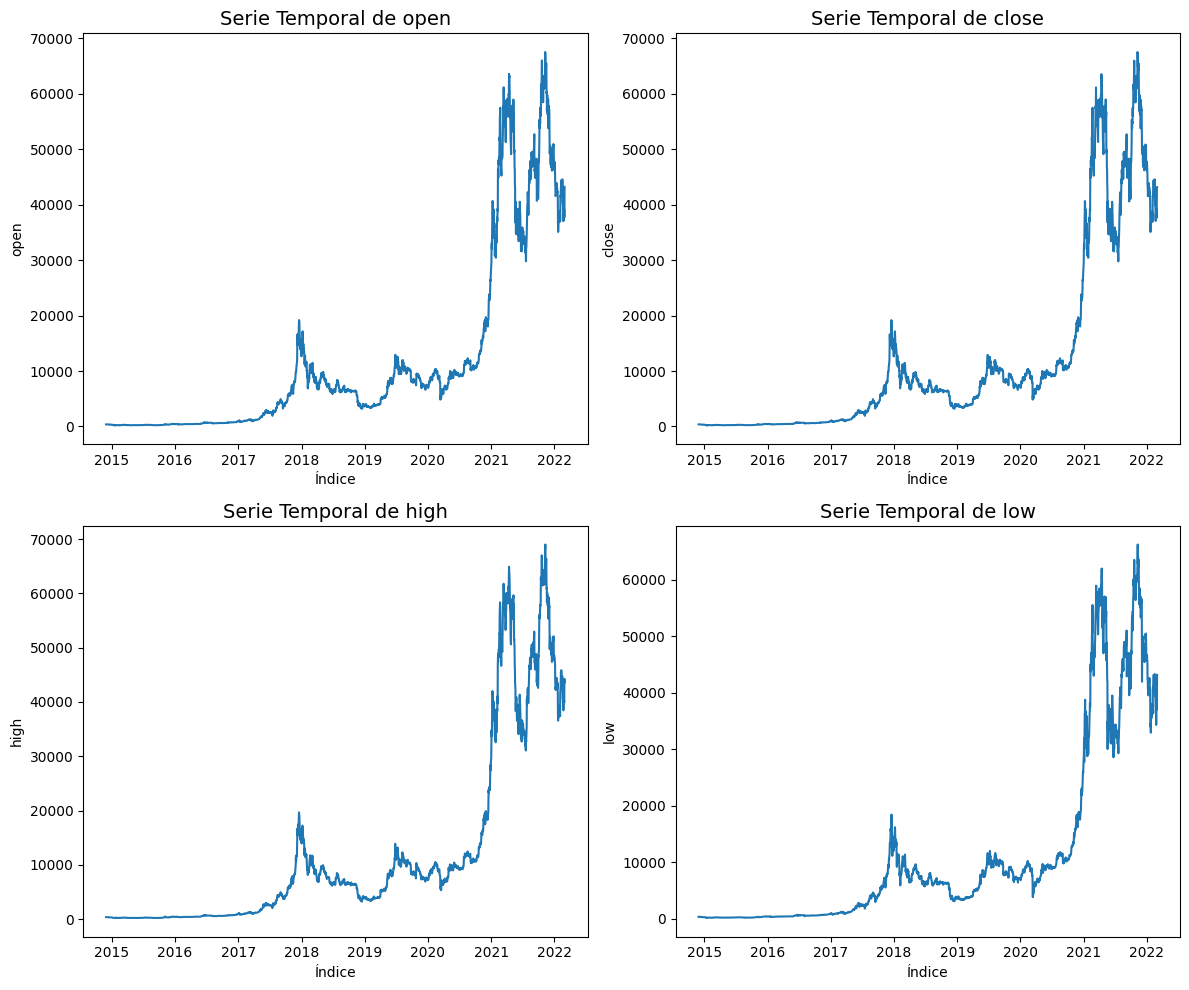

In [15]:
numerical_columns = ["open","close","high","low"]

plot_time_series(df_bitcoin,numerical_columns)


### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [16]:
def plot_time_series(df, numerical_columns, combined=False, start_date=None, end_date=None):
   
    # Filtrar por rango de fechas si es necesario
    if start_date or end_date:
        df = df.loc[start_date:end_date]

    # Asegurarse de que las columnas sean nombres o Series
    column_names = [col if isinstance(col, str) else col.name for col in numerical_columns]

    if combined:
        # Crear una sola gráfica combinada
        plt.figure(figsize=(12, 6))
        for col in column_names:
            sns.lineplot(data=df, x=df.index, y=col, label=col)
        plt.title("Series Temporales Combinadas", fontsize=14)
        plt.xlabel("Fecha")
        plt.ylabel("Valores")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        # Determinar el número de filas y columnas para la matriz de gráficas
        num_columns = 2
        num_rows = math.ceil(len(column_names) / num_columns)

        # Crear la figura
        fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 5 * num_rows))
        axes = axes.flatten()  # Asegurarse de que los ejes sean iterables
          
        for i, col in enumerate(column_names):
            # Graficar la serie temporal en el eje correspondiente
            sns.lineplot(data=df, x=df.index, y=col, ax=axes[i])
            
            # Configurar el título
            axes[i].set_title(f"Serie Temporal de {col}", fontsize=14)
            axes[i].set_xlabel("Fecha")
            axes[i].set_ylabel(col)

        # Eliminar ejes sobrantes si hay
        for j in range(len(column_names), len(axes)):
            fig.delaxes(axes[j])

        # Ajustar el layout
        plt.tight_layout()
        plt.show()



### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.